# TAREA

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [1]:
import numpy as np
import random
import pandas as pd

def f1(x) :
    return ( np.exp(x)*np.log(x) )

def f2(x) :
    return ( np.sin(x)*np.log(x) )

N = np.logspace(1, 5, 5)
table = pd.DataFrame(columns = ['Aproximación Función 1', 'Error Función 1', 'Aproximación Función 2', 'Error Función 2'], index = N )

def montecarlo(f, N, a, b,) :
    u = np.random.uniform(a, b, round(N))
    return np.mean(f(u)) * (b - a)

for i in N :
    table.loc[i, 'Aproximación Función 1'] = montecarlo(f1, int(i), 1, 3)
    table['Error Función 1'] = np.abs( 14.0275 - table['Aproximación Función 1'])
    table.loc[i, 'Aproximación Función 2'] = montecarlo(f2, int(i), 1, 3)
    table['Error Función 2'] = np.abs( 0.869844 - table['Aproximación Función 2'])
table
    

,Aproximación Función 1,Error Función 1,Aproximación Función 2,Error Función 2
10.0,8.605758,5.421742,0.72094,0.148904
100.0,15.911011,1.883511,0.853735,0.016109
1000.0,14.488801,0.461301,0.877541,0.007697
10000.0,13.878083,0.149417,0.869351,0.000493
100000.0,13.988447,0.039053,0.870646,0.000802


In [2]:
np.log10?

In [3]:
np.sin?

2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

**Primero definimos la función de Bernoulli y nuestra función de Montecarlo**

In [4]:
import numpy as np
import random

def bernoulli(x, y) :
    return ( x**2 + 2*y**2 ) <= ( -2*x + 8*y -7 )

def montecarlo(region, ax, bx, ay, by, N) :
    x = np.random.uniform(ax, bx, N)
    y = np.random.uniform(ay, by, N)
    B = region(x, y)
    AR = (bx - ax) * (by - ay)
    return np.mean(B)*AR

**Graficamos el área de la región, tanteando los valores de los ejes $x$ y $y$**

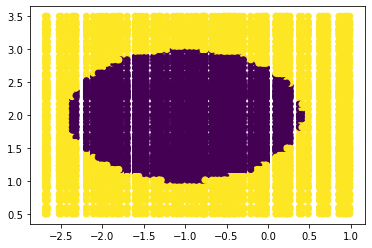

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

N = 100
x = np.random.uniform(-2.75, 1, N)
y = np.random.uniform(0.5, 3.5, N)
X, Y = np.meshgrid(x, y)

plt.figure()
plt.scatter(X, Y, c=~bernoulli(X, Y))

**Ahora aproximamos el área de la región usando 10 términos o 10 "dardos"**

In [18]:
montecarlo(bernoulli, -2.75, 1, 0.5, 3.5, 10)

3.375

**Aproximación de área de la región usando 100 términos o 100 dardos**

In [21]:
montecarlo(bernoulli, -2.75, 1, 0.5, 3.5, 100)

4.275

**Aproximación de área de la región usando 1,000 términos o 1,000 dardos**

In [24]:
montecarlo(bernoulli, -2.75, 1, 0.5, 3.5, 1000)

4.4887500000000005

**Aproximación de área de la región usando 10,000 términos o 10,000 dardos**

In [26]:
montecarlo(bernoulli, -2.75, 1, 0.5, 3.5, 10000)

4.53825

**Aproximación de área de la región usando 100,000 términos o 100,000 dardos**

In [27]:
montecarlo(bernoulli, -2.75, 1, 0.5, 3.5, 100000)

4.416975

Tenemos que la aproximación más precisa del área de la región descrita por: 
$$ x^2 + 2y^2 \leq -2x + 8y -7 $$

es de =~ 4.44 $u^2$ (unidades cuadradas de área)

Tabla con las aproximaciones de área utilizando $N$ términos (que van de 10, 100, 1,000, 10,000 y 100,000) y sus respectivos errores

3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.